In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
db = sqlite3.connect('../../datasets/checking-logs.sqlite')

In [4]:
query = """ SELECT timestamp, uid FROM checker
WHERE uid LIKE 'user_%'"""
commits = pd.read_sql(query, db, parse_dates='timestamp')
commits

timestamp     uid
0    2020-04-17 05:19:02.744528  user_4
1    2020-04-17 05:22:35.249331  user_4
2    2020-04-17 05:22:45.549397  user_4
3    2020-04-17 05:34:14.691200  user_4
4    2020-04-17 05:34:24.422370  user_4
...                         ...     ...
3202 2020-05-21 20:19:06.872761  user_1
3203 2020-05-21 20:22:41.785725  user_1
3204 2020-05-21 20:22:41.877806  user_1
3205 2020-05-21 20:37:00.129678  user_1
3206 2020-05-21 20:37:00.290491  user_1

[3207 rows x 2 columns]

In [46]:
commits['hour'] = commits['timestamp'].dt.hour
commits['day'] = commits['timestamp'].dt.day
commits['weekday'] = commits['timestamp'].dt.dayofweek
commits['type'] = commits['weekday'].apply(lambda x: 'weekend' if x>=5 else 'working_day')
commits = commits.drop(columns = ['weekday'])
commits


timestamp     uid  hour  day         type
0    2020-04-17 05:19:02.744528  user_4     5   17  working_day
1    2020-04-17 05:22:35.249331  user_4     5   17  working_day
2    2020-04-17 05:22:45.549397  user_4     5   17  working_day
3    2020-04-17 05:34:14.691200  user_4     5   17  working_day
4    2020-04-17 05:34:24.422370  user_4     5   17  working_day
...                         ...     ...   ...  ...          ...
3202 2020-05-21 20:19:06.872761  user_1    20   21  working_day
3203 2020-05-21 20:22:41.785725  user_1    20   21  working_day
3204 2020-05-21 20:22:41.877806  user_1    20   21  working_day
3205 2020-05-21 20:37:00.129678  user_1    20   21  working_day
3206 2020-05-21 20:37:00.290491  user_1    20   21  working_day

[3207 rows x 5 columns]

In [50]:
workday = commits[commits['type']== 'working_day'][['hour']].reset_index(drop=True)
weekend = commits[commits['type']== 'weekend'][['hour']].reset_index(drop=True)


In [51]:
weekend

hour
0        7
1       13
2       13
3       13
4       13
...    ...
1165    22
1166    22
1167    22
1168    22
1169    22

[1170 rows x 1 columns]

In [53]:
workday

hour
0        5
1        5
2        5
3        5
4        5
...    ...
2032    20
2033    20
2034    20
2035    20
2036    20

[2037 rows x 1 columns]

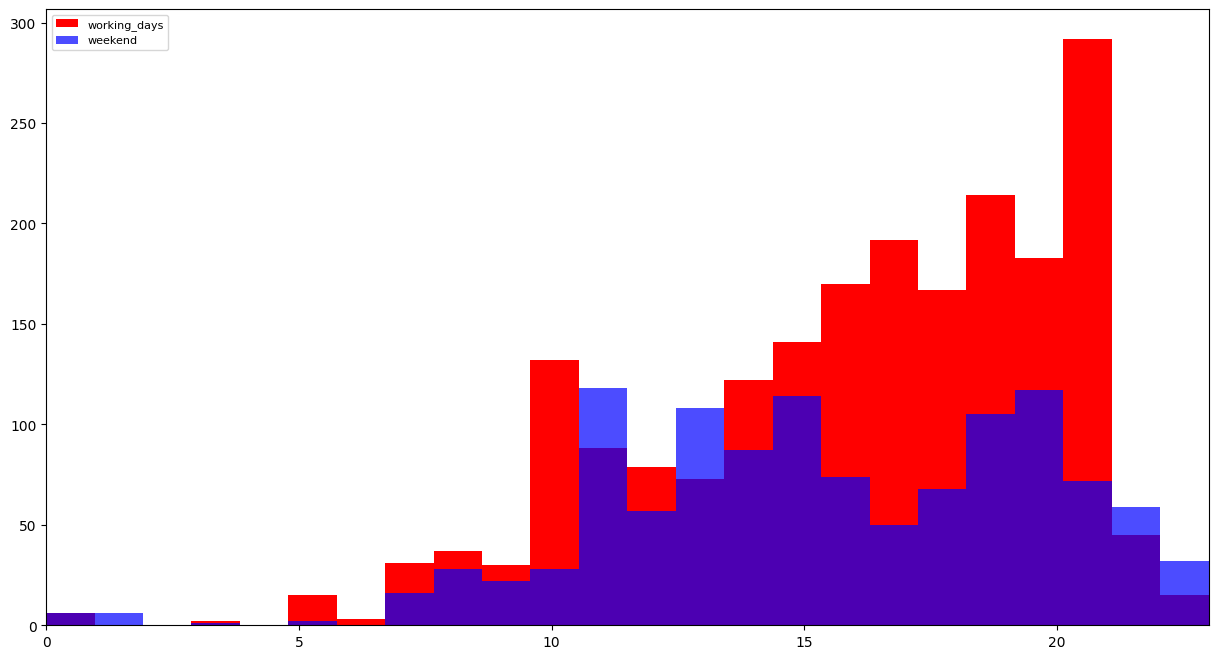

In [48]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(workday['hour'], bins=24, label='working_days', color='red')
ax.hist(weekend['hour'], bins=24, label= 'weekend', color='blue', alpha=0.7)
ax.set_xlim(0,23)
ax.legend(loc='upper left', fontsize=8)

In [49]:
db.close()

Are there hours when the total number of commits was higher on weekends than on working days?

11.13.22.23